**Q1: Design the circuit using qiskit and check the output for different input output combinations**

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def test_circuit_logic():
    simulator = AerSimulator()
    
    print(f"{'Input (q1 q2 q3)':<20} | {'Output Counts (Measured q1 q2 q3)'}")
    print("-" * 60)

    for i in range(8):
        qc = QuantumCircuit(3, 3)
        
        input_bin = format(i, '03b')
        
        if input_bin[0] == '1':
            qc.x(0)
        if input_bin[1] == '1':
            qc.x(1)
        if input_bin[2] == '1':
            qc.x(2)
            
        qc.barrier() 
        
        qc.h(0)
        
        qc.x(0) 
        qc.ccx(0, 1, 2)
        qc.x(0)
        
        qc.measure([0, 1, 2], [0, 1, 2])
        
        job = simulator.run(transpile(qc, simulator), shots=1000)
        result = job.result()
        counts = result.get_counts()
        
        formatted_counts = {k[::-1]: v for k, v in counts.items()}
        print(f"{input_bin:<20} | {formatted_counts}")

if __name__ == "__main__":
    test_circuit_logic()

Input (q1 q2 q3)     | Output Counts (Measured q1 q2 q3)
------------------------------------------------------------
000                  | {'100': 477, '000': 523}
001                  | {'101': 505, '001': 495}
010                  | {'011': 509, '110': 491}
011                  | {'111': 509, '010': 491}
100                  | {'100': 498, '000': 502}
101                  | {'001': 512, '101': 488}
110                  | {'011': 492, '110': 508}
111                  | {'111': 500, '010': 500}


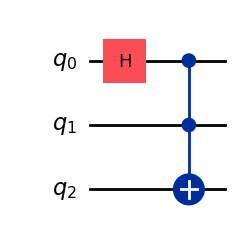

In [6]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import XGate

qc = QuantumCircuit(3)

qc.h(0)

custom_toffoli = XGate().control(num_ctrl_qubits=2, ctrl_state='11')

qc.append(custom_toffoli, [0, 1, 2])

qc.draw('mpl')

**Q2: Design the circuit using qiskit and check the output for different input output combinations**

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def design_and_test_cswap():
    simulator = AerSimulator()

    print(f"{'Input (q1 q2 q3)':<20} | {'Output Counts (Measured q1 q2 q3)'}")
    print("-" * 65)

    for i in range(8):
        qc = QuantumCircuit(3, 3)
        
        input_bin = format(i, '03b')
        
        if input_bin[0] == '1': qc.x(0)
        if input_bin[1] == '1': qc.x(1)
        if input_bin[2] == '1': qc.x(2)
        
        qc.barrier() 
        
        qc.h(0)
        
        qc.x(2)
        
        qc.cswap(0, 1, 2)
        
        qc.measure([0, 1, 2], [0, 1, 2])
        
        job = simulator.run(transpile(qc, simulator), shots=1000)
        result = job.result()
        counts = result.get_counts()
        
        formatted_counts = {k[::-1]: v for k, v in counts.items()}
        print(f"{input_bin:<20} | {formatted_counts}")

if __name__ == "__main__":
    design_and_test_cswap()

Input (q1 q2 q3)     | Output Counts (Measured q1 q2 q3)
-----------------------------------------------------------------
000                  | {'110': 486, '001': 514}
001                  | {'000': 490, '100': 510}
010                  | {'011': 512, '111': 488}
011                  | {'101': 499, '010': 501}
100                  | {'110': 490, '001': 510}
101                  | {'000': 513, '100': 487}
110                  | {'011': 532, '111': 468}
111                  | {'101': 501, '010': 499}


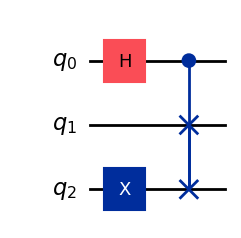

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)

qc.h(0)

qc.x(2)

qc.cswap(0, 1, 2)

qc.draw('mpl')

**Q3.** 
- Compute the output of a quantum circuit. Consider the following quantum circuit on two qubits.

- Proof that the order of unitary compositions is crucial in quantum operations, considering the combination of Hadamard. Phase gate and T-gate.


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def test_circuit_logic():
    qc = QuantumCircuit(2, 2)

    qc.x(1)
    
    qc.barrier()

    qc.h(0)
    
    qc.cx(0, 1)
    
    qc.z(1)
    
    qc.cx(1, 0)
    
    qc.h(1)
    
    qc.measure([0, 1], [0, 1])

    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts()

    print("Output Counts:", counts)
    
    print("\nCircuit Diagram:")
    print(qc.draw(output='text'))

if __name__ == "__main__":
    test_circuit_logic()

Output Counts: {'11': 1000}

Circuit Diagram:
           ░ ┌───┐          ┌───┐     ┌─┐   
q_0: ──────░─┤ H ├──■───────┤ X ├─────┤M├───
     ┌───┐ ░ └───┘┌─┴─┐┌───┐└─┬─┘┌───┐└╥┘┌─┐
q_1: ┤ X ├─░──────┤ X ├┤ Z ├──■──┤ H ├─╫─┤M├
     └───┘ ░      └───┘└───┘     └───┘ ║ └╥┘
c: 2/══════════════════════════════════╩══╩═
                                       0  1 


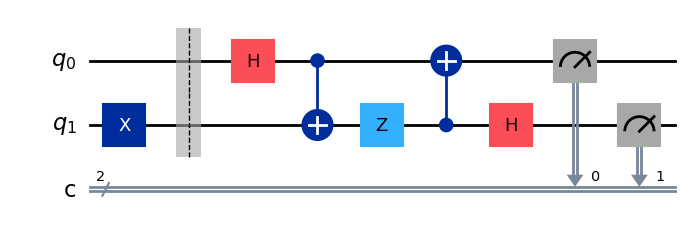

In [18]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2, 2)

qc.x(1)          
qc.barrier()     
qc.h(0)          
qc.cx(0, 1)      
qc.z(1)          
qc.cx(1, 0)      
qc.h(1)          

qc.measure([0, 1], [0, 1])

qc.draw('mpl')

In [16]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

def check_commutativity():
    qc1 = QuantumCircuit(1)
    qc1.h(0)
    qc1.t(0)
    
    op1 = Operator(qc1)
    
    qc2 = QuantumCircuit(1)
    qc2.t(0)
    qc2.h(0)
    
    op2 = Operator(qc2)
    
    print("Matrix 1 (H then T):")
    
    print(np.round(op1.data, 3))
    print("\n" + "-"*30 + "\n")
    
    print("Matrix 2 (T then H):")
    print(np.round(op2.data, 3))
    print("\n" + "-"*30 + "\n")

    are_equal = np.allclose(op1.data, op2.data)
      
if __name__ == "__main__":
    check_commutativity()


Matrix 1 (H then T):
[[ 0.707+0.j   0.707+0.j ]
 [ 0.5  +0.5j -0.5  -0.5j]]

------------------------------

Matrix 2 (T then H):
[[ 0.707+0.j   0.5  +0.5j]
 [ 0.707+0.j  -0.5  -0.5j]]

------------------------------

